In [64]:
#Import dependencies

import pandas as pd
import sqlite3
from textblob import TextBlob
import matplotlib.pyplot as plt


In [3]:
#Connect to the Bible DB

conn = sqlite3.connect("bible-sqlite.db")
cur = conn.cursor()

In [4]:
# Accessing DB meta-data

# Table column names in order: id, b, c, v , t 

for row in cur.execute('SELECT * FROM bible_version_key;'):
    print(row)

(1, 't_asv', 'ASV', 'english', 'American Standard-ASV1901', '', 'http://en.wikipedia.org/wiki/American_Standard_Version', '', 'Public Domain', '')
(2, 't_bbe', 'BBE', 'english', 'Bible in Basic English', '', 'http://en.wikipedia.org/wiki/Bible_in_Basic_English', '', 'Public Domain', '')
(3, 't_dby', 'DARBY', 'english', 'Darby English Bible', '', 'http://en.wikipedia.org/wiki/Darby_Bible', '', 'Public Domain', '')
(4, 't_kjv', 'KJV', 'english', 'King James Version', '', 'http://en.wikipedia.org/wiki/King_James_Version', '', 'Public Domain', '')
(5, 't_wbt', 'WBT', 'english', "Webster's Bible", '', 'http://en.wikipedia.org/wiki/Webster%27s_Revision', '', 'Public Domain', '')
(6, 't_web', 'WEB', 'english', 'World English Bible', '', 'http://en.wikipedia.org/wiki/World_English_Bible', '', 'Public Domain', '')
(7, 't_ylt', 'YLT', 'english', "Young's Literal Translation", '', 'http://en.wikipedia.org/wiki/Young%27s_Literal_Translation', '', 'Public Domain', '')


In [88]:
#for row in cur.execute('select distinct(b) from t_kjv;'):
 #   print(row)

In [87]:
#Accessing all lines from King James Bible

king_james_query = cur.execute('Select t from t_kjv')
king_james_list = []

counter = 0

for row in king_james_query:
    king_james_list.append(row[0])
    counter += 1
    if counter == 100:
        break
    

In [13]:
#Accessing all lines from American Standard Bible

american_standard_query = cur.execute('Select t from t_asv')
american_standard_list = []

counter = 0

for row in american_standard_query:
    american_standard_list.append(row[0])
    counter += 1
    if counter == 100:
        break
    

In [42]:
#Sentiment Analysis for King James using TextBlob for each line
    # Un-needed
    
king_james_sentiment = []

for row in king_james_list:
    king_james_blob = TextBlob(row)
    king_james_sentiment.append(king_james_blob.sentiment)

In [43]:
#Sentiment Analysis for American Standard using TextBlob for each line
    #Un-needed

american_standard_sentiment = []

for row in american_standard_list:
    a_s_blob = TextBlob(row)
    american_standard_sentiment.append(a_s_blob.sentiment)

In [56]:
# Structuring data for King James Bible -- Genesis 

big_query = cur.execute('Select * from t_kjv where id between 01001001 and 01999999;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
king_james_genesis = pd.DataFrame(data=data)
king_james_genesis.head()

In [57]:
# Error Checking 
    # Un-needed

print(len(full_id), len(book), len(chapter), len(verse), len(text), len(polarity), len(subjective))

1533 1533 1533 1533 1533 1533 1533


In [62]:
# Structuring data for American Standard -- Genesis Book

big_query = cur.execute('Select * from t_asv where id between 01001001 and 01999999;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])


# Creating the American Standard pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
american_standard_genesis = pd.DataFrame(data=data)
american_standard_genesis.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,1001001,1,1,1,In the beginning God created the heavens and t...,0.0,0.000000
1,1001002,1,1,2,And the earth was waste and void; and darkness...,-0.1,0.200000
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",0.4,0.700000
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",0.5,0.666667
4,1001005,1,1,5,"And God called the light Day, and the darkness...",0.4,0.700000


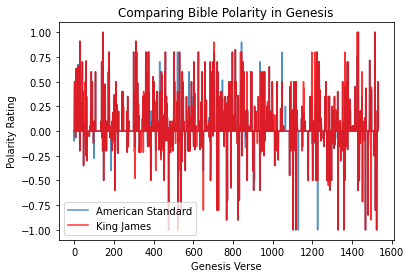

In [76]:
# Comparing the polarity of King James and American Standard Geneis verse

plt.plot(american_standard_genesis.index, american_standard_genesis['polarity'], alpha=0.8, label='American Standard')
plt.plot(king_james_genesis.index, king_james_genesis['polarity'], color='red', alpha=0.8, label='King James')
plt.title('Comparing Bible Polarity in Genesis')
plt.xlabel('Genesis Verse')
plt.ylabel('Polarity Rating')
plt.legend()
plt.show()

In [94]:
# Structuring data for King James Bible -- First book of New Testament - Matthew 

big_query = cur.execute('Select * from t_kjv where id between 39001001 and 40000000;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
king_james_matthew = pd.DataFrame(data=data)
king_james_matthew.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,39001001,39,1,1,The burden of the word of the LORD to Israel b...,0.000000,0.000000
1,39001002,39,1,2,"I have loved you, saith the LORD. Yet ye say, ...",0.700000,0.800000
2,39001003,39,1,3,"And I hated Esau, and laid his mountains and h...",-0.550000,0.350000
3,39001004,39,1,4,"Whereas Edom saith, We are impoverished, but w...",-0.155556,0.288889
4,39001005,39,1,5,"And your eyes shall see, and ye shall say, The...",0.000000,0.000000


In [95]:
# Structuring data for American Standard Bible -- First book of New Testament - Matthew 

big_query = cur.execute('Select * from t_asv where id between 39001001 and 40000000;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
american_standard_matthew = pd.DataFrame(data=data)
american_standard_matthew.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,39001001,39,1,1,The burden of the word of Jehovah to Israel by...,0.00000,0.000000
1,39001002,39,1,2,"I have loved you, saith Jehovah. Yet ye say, W...",0.70000,0.800000
2,39001003,39,1,3,"but Esau I hated, and made his mountains a des...",-0.90000,0.700000
3,39001004,39,1,4,"Whereas Edom saith, We are beaten down, but we...",-0.17037,0.192593
4,39001005,39,1,5,"And your eyes shall see, and ye shall say, Jeh...",0.00000,0.000000


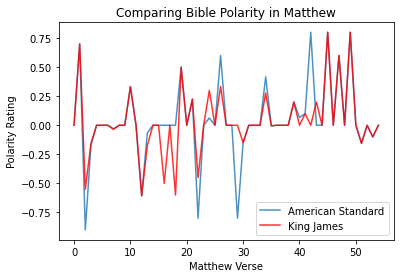

In [96]:
# Comparing the polarity of King James and American Standard Matthew verse

plt.plot(american_standard_matthew.index, american_standard_matthew['polarity'], alpha=0.8, label='American Standard')
plt.plot(king_james_matthew.index, king_james_matthew['polarity'], color='red', alpha=0.8, label='King James')
plt.title('Comparing Bible Polarity in Matthew')
plt.xlabel('Matthew Verse')
plt.ylabel('Polarity Rating')
plt.legend()
plt.show()

In [110]:
# Looking at the phrase with significant difference

print(king_james_matthew.iloc[29, 4], king_james_matthew.iloc[29, 5])
print(american_standard_matthew.iloc[29, 4], american_standard_matthew.iloc[29, 5])

For the LORD, the God of Israel, saith that he hateth putting away: for one covereth violence with his garment, saith the LORD of hosts: therefore take heed to your spirit, that ye deal not treacherously. 0.0
For I hate putting away, saith Jehovah, the God of Israel, and him that covereth his garment with violence, saith Jehovah of hosts: therefore take heed to your spirit, that ye deal not treacherously. -0.8
